#**Advance ML Homework_4_ K-Means Clustering**
Simulasi tugas Mesin Learning Lanjut dengan Python

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Create the DataFrame**

In [ ]:
#Membuat dataframe dengan memasukan nilai NaN
df = pd.DataFrame({'x': [18, np.nan, 19, 14, 14, 11, 20, 28, 30, 31,
                              35, 33, 29, 25, 25, 27, 29, 30, 19, 23],
                   'y': [3, 3, 4, 5, 4, 7, 8, 7, 6, 9, 12, 14,
                               np.nan, 9, 4, 3, 4, 12, 15, 11],
                   'z': [15, 14, 14, 10, 8, 14, 13, 9, 5, 4,
                                11, 6, 5, 5, 3, 8, 12, 7, 6, 5]})

print(df.head(20))

       x     y   z
0   18.0   3.0  15
1    NaN   3.0  14
2   19.0   4.0  14
3   14.0   5.0  10
4   14.0   4.0   8
5   11.0   7.0  14
6   20.0   8.0  13
7   28.0   7.0   9
8   30.0   6.0   5
9   31.0   9.0   4
10  35.0  12.0  11
11  33.0  14.0   6
12  29.0   NaN   5
13  25.0   9.0   5
14  25.0   4.0   3
15  27.0   3.0   8
16  29.0   4.0  12
17  30.0  12.0   7
18  19.0  15.0   6
19  23.0  11.0   5


**Clean & Prep the DataFrame**

In [ ]:
#Menghapus nilai NaN
df = df.dropna()

#Penskalaan pada dataset
scaled_df = StandardScaler().fit_transform(df)
print(scaled_df[:5])

[[-0.86660275 -1.22683918  1.72722524]
 [-0.72081911 -0.96077767  1.45687694]
 [-1.44973731 -0.69471616  0.37548375]
 [-1.44973731 -0.96077767 -0.16521285]
 [-1.88708823 -0.16259314  1.45687694]]


**Mencari Cluster paling optimal dengan menentukan harga K**

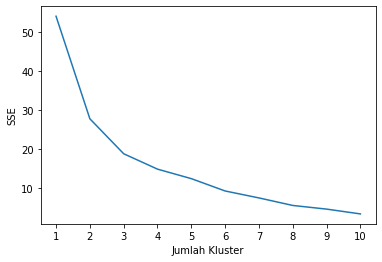

In [7]:
#Inisialisasi Parameter K-Means
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#Hitung nilai SSE berdasarkan harga K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualisasi hasil
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Jumlah Kluster")
plt.ylabel("SSE")
plt.show()

**Hasil clustering dengan nilai K tertentu**

In [ ]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)
kmeans.fit(scaled_df)
kmeans.labels_
df['cluster'] = kmeans.labels_
print(df)

       x     y   z  cluster
0   18.0   3.0  15        2
2   19.0   4.0  14        2
3   14.0   5.0  10        2
4   14.0   4.0   8        2
5   11.0   7.0  14        2
6   20.0   8.0  13        2
7   28.0   7.0   9        1
8   30.0   6.0   5        1
9   31.0   9.0   4        0
10  35.0  12.0  11        0
11  33.0  14.0   6        0
13  25.0   9.0   5        3
14  25.0   4.0   3        1
15  27.0   3.0   8        1
16  29.0   4.0  12        1
17  30.0  12.0   7        0
18  19.0  15.0   6        3
19  23.0  11.0   5        3
